In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Yearly Sunspot Data')

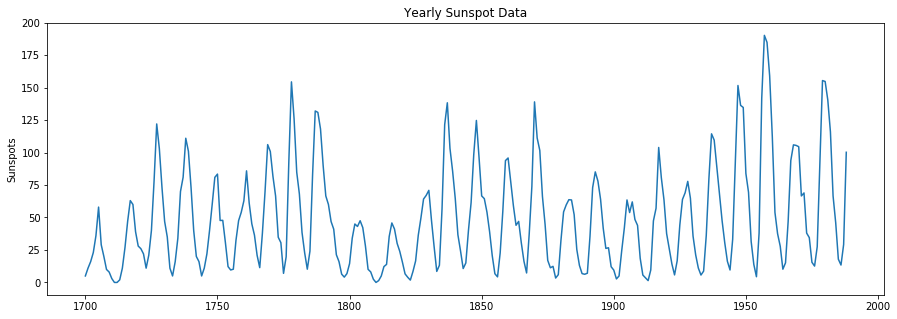

In [2]:
data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sunspot.year.csv')
data.index = data['time'].values
data['sunspot.year'] = data['value']


plt.figure(figsize=(15, 5))
plt.plot(data.index, data['sunspot.year'])
plt.ylabel('Sunspots')
plt.title('Yearly Sunspot Data')

In [3]:
model= pf.DAR(data=data, ar=9, integ=0, target='sunspot.year')

In [4]:
x = model.fit('MLE')
x.summary()

DAR(9, integrated=0)                                                                                      
======================================================= ==================================================
Dependent Variable: sunspot.year                        Method: MLE                                       
Start Date: 1709                                        Log Likelihood: -1179.0907                        
End Date: 1988                                          AIC: 2380.1815                                    
Number of observations: 280                             BIC: 2420.1642                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        0.3363                                                           
Constant                             

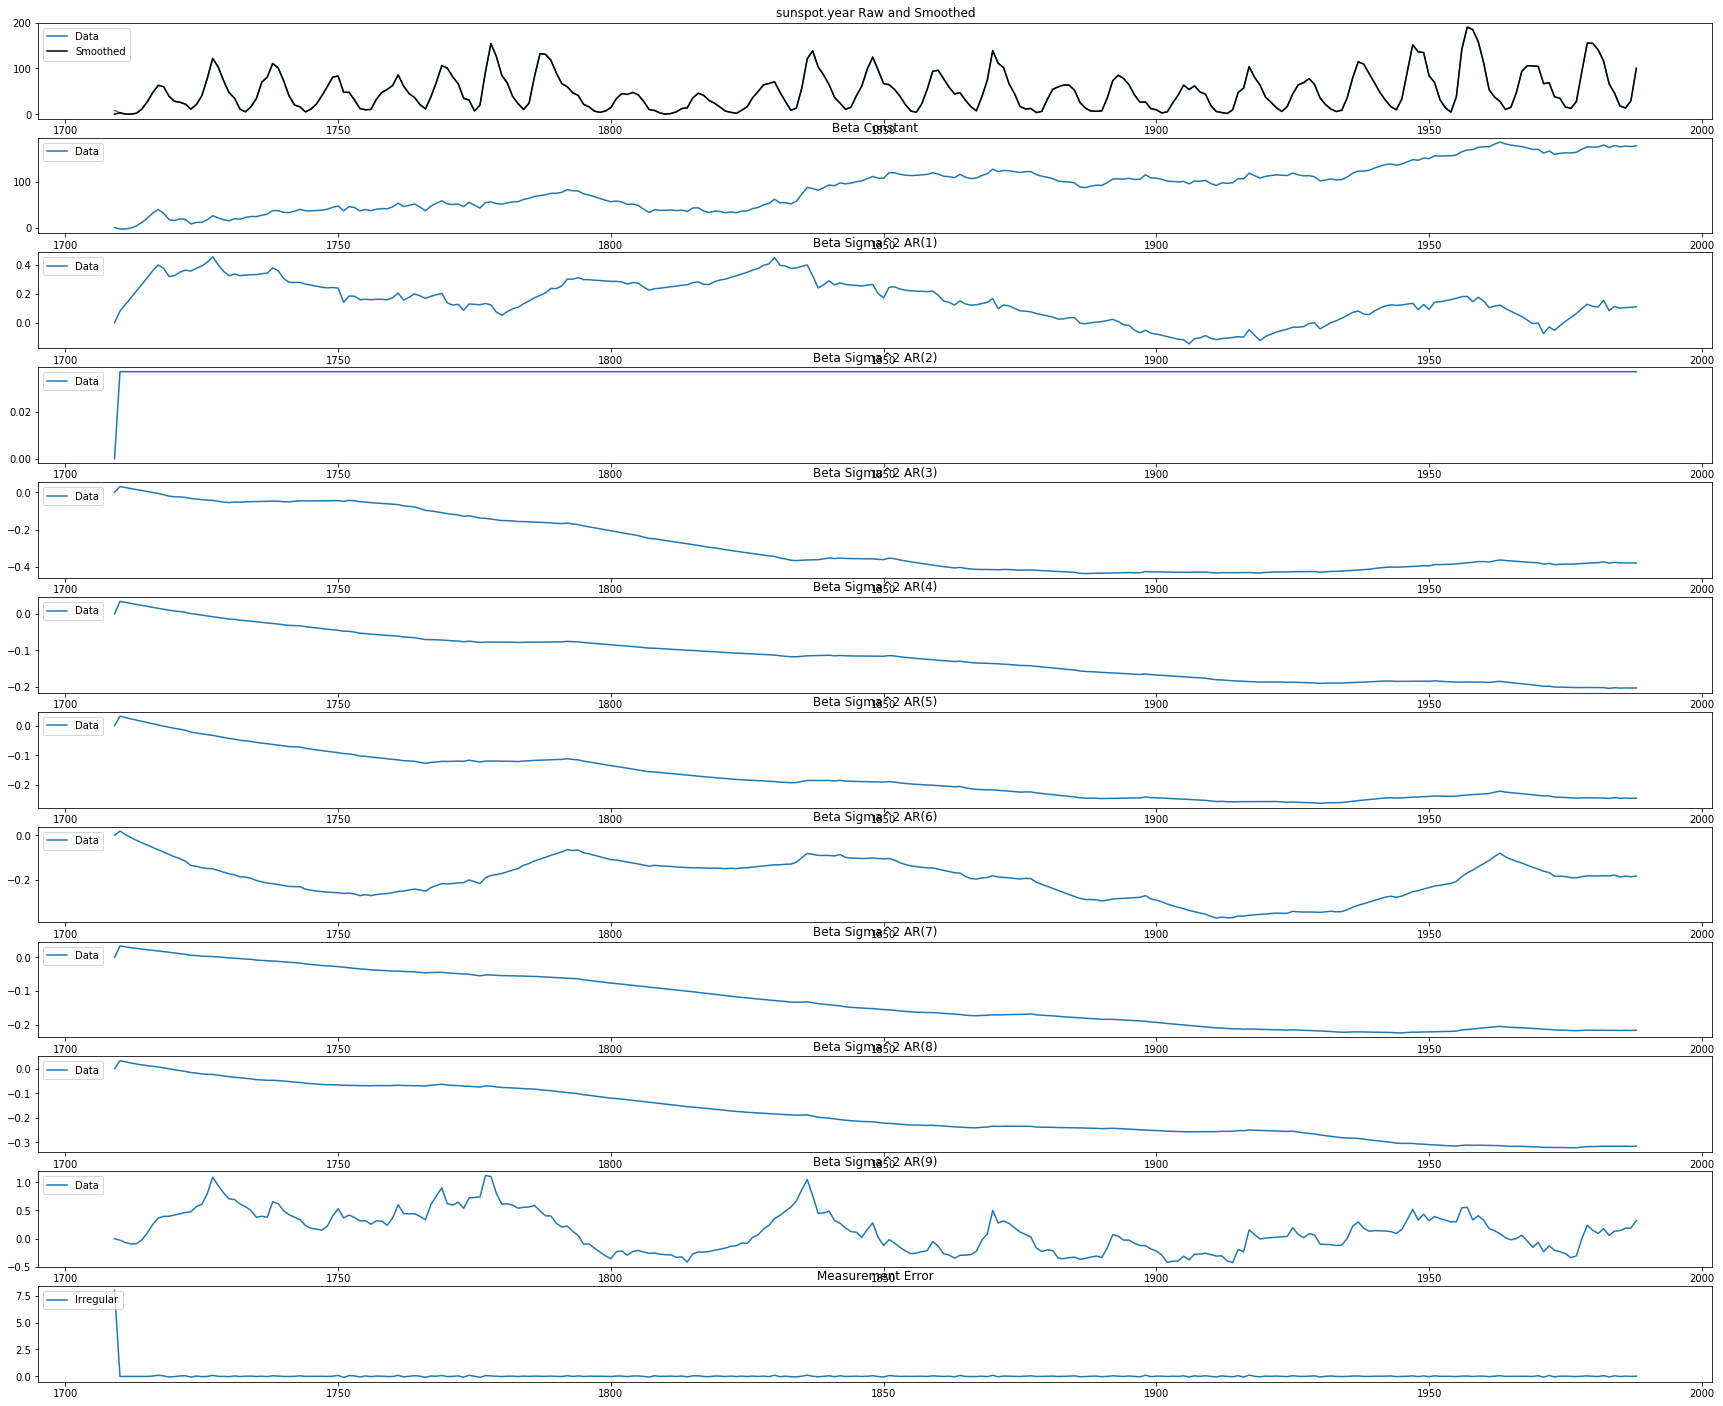

In [5]:
model.plot_fit(figsize=(30, 25))

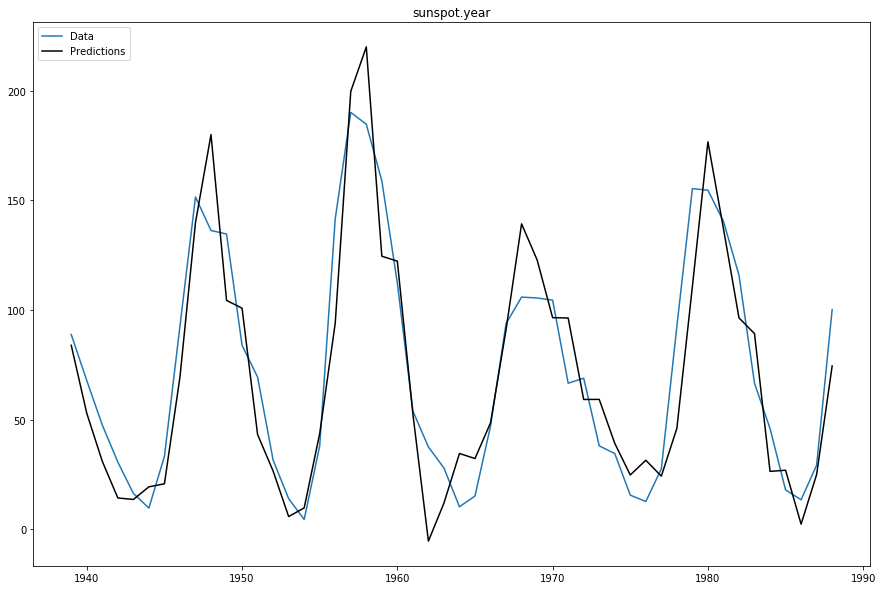

In [6]:
model.plot_predict_is(h=50, figsize=(15, 10))

In [7]:
data.head()

,Unnamed: 0,time,value,sunspot.year
1700,1,1700,5.0,5.0
1701,2,1701,11.0,11.0
1702,3,1702,16.0,16.0
1703,4,1703,23.0,23.0
1704,5,1704,36.0,36.0


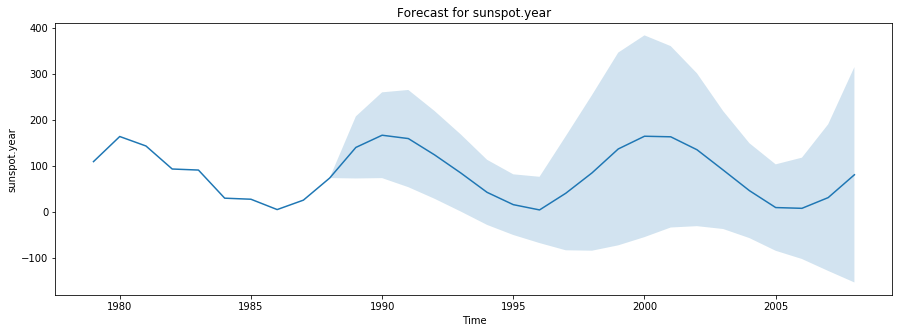

In [9]:
model.plot_predict(h=20, past_values=10, figsize=(15,5))

In [10]:
pred = model.predict(h=20)

In [13]:
pred.head(10)

,sunspot.year
1989,139.689386
1990,166.166685
1991,158.899830
1992,123.469341
1993,84.135879
1994,42.173782
1995,15.421819
1996,3.994706
1997,40.192806
1998,84.412357
